In [547]:
import pandas as pd
df = pd.read_csv("movie_industry.csv", encoding = "latin1")

In [548]:
df = df[df["budget"] != 0]

In [549]:
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import roc_curve, auc,recall_score,precision_score, mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.metrics import average_precision_score

In [550]:
import datetime
def weeknumber(ymd):
    try:
        arr = ymd.split("-")
        y = arr[0]
        m = arr[1]
        d = arr[2]
        return datetime.date(int(y), int(m), int(d)).isocalendar()[1]
    except:
        return -1

In [551]:
import datetime
datetime.date(5, 6, 22).isocalendar()[1]

25

In [552]:
df["weekrelease"] = df.apply(lambda row: weeknumber(row["released"]), axis = 1)

# Projecting gross revenue 

In [553]:
X = df
Y = df["gross"].div(1000000)

In [554]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [555]:
ratings = {}
def zscores(name, column):
    if(name in ratings):
        return ratings[name]
    else:
        up = X_train[X_train[column] == name]
        if(len(up) < 3):
            return 0
        mnup = np.mean(up["gross"])
        mnX = np.mean(X_train["gross"])
        std = np.std(X_train["gross"])
        ratings[name] = (mnup - mnX)/std
        return ratings[name]


In [556]:
X_train["rating zscore"] = X_train.apply(lambda row: zscores(row["rating"], "rating"), axis = 1)
X_test["rating zscore"] = X_test.apply(lambda row: zscores(row["rating"], "rating"), axis = 1)

/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [557]:
X_train["genre zscore"] = X_train.apply(lambda row: zscores(row["genre"], "genre"), axis = 1)
X_test["genre zscore"] = X_test.apply(lambda row: zscores(row["genre"], "genre"), axis = 1)

/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [558]:
X_train["weekrelease zscore"] = X_train.apply(lambda row: zscores(row["weekrelease"], "weekrelease"), axis = 1)
X_test["weekrelease zscore"] = X_test.apply(lambda row: zscores(row["weekrelease"], "weekrelease"), axis = 1)

/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [559]:
X_train["company zscore"] = X_train.apply(lambda row: zscores(row["company"], "company"), axis = 1)
X_test["company zscore"] = X_test.apply(lambda row: zscores(row["company"], "company"), axis = 1)

/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [560]:
X_train["star zscore"] = X_train.apply(lambda row: zscores(row["star"], "star"), axis = 1)
X_test["star zscore"] = X_test.apply(lambda row: zscores(row["star"], "star"), axis = 1)

/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [561]:
X_train["writer zscore"] = X_train.apply(lambda row: zscores(row["writer"], "writer"), axis = 1)
X_test["writer zscore"] = X_test.apply(lambda row: zscores(row["writer"], "writer"), axis = 1)

/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [562]:
X_train["director zscore"] = X_train.apply(lambda row: zscores(row["director"], "director"), axis = 1)
X_test["director zscore"] = X_test.apply(lambda row: zscores(row["director"], "director"), axis = 1)

/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [563]:
X_train1 = X_train[["budget", "rating zscore", "weekrelease zscore", "star zscore", "company zscore", "writer zscore"]]
X_train1["budget"] = X_train1["budget"].divide(1000000)

/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [564]:
xtrain1 = X_train1.to_numpy()
ytrain1 = y_train.to_numpy()

In [565]:
xtest1 = X_test[["budget", "rating zscore", "weekrelease zscore", "star zscore", "company zscore", "writer zscore"]]
xtest1["budget"] = xtest1["budget"].divide(1000000)
xtest1 = xtest1.to_numpy()
ytest1 = y_test.to_numpy()





/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [566]:
model = linear_model.LinearRegression().fit(xtrain1, ytrain1)


In [639]:
y_train_pred1 = model.predict(xtrain1)
y_pred1 = model.predict(xtest1)

print('Train r2 score: ', r2_score(y_train_pred1, ytrain1))
print('Test r2 score: ', r2_score(ytest1, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, ytrain1)
test_mse1 = mean_squared_error(y_pred1, ytest1)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

model_train_r2 = []
model_test_r2 = []
model_train_rmse = []
model_test_rmse = []

model_train_r2.append(r2_score(y_train_pred1, ytrain1))
model_test_r2.append(r2_score(ytest1, y_pred1))
model_train_rmse.append(train_rmse1)
model_test_rmse.append(test_rmse1)

print(model_test_rmse)

Train r2 score:  0.3697363257911197
Test r2 score:  0.5261518568412057
Train RMSE: 39.8489
Test RMSE: 49.4704
[49.47038729429047]


In [640]:
model = linear_model.Lasso(alpha=250).fit(xtrain1, ytrain1)
y_train_pred1 = model.predict(xtrain1)
y_pred1 = model.predict(xtest1)

print('Train r2 score: ', r2_score(y_train_pred1, ytrain1))
print('Test r2 score: ', r2_score(ytest1, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, ytrain1)
test_mse1 = mean_squared_error(y_pred1, ytest1)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

Train r2 score:  -0.5784339057138641
Test r2 score:  0.43144976211550246
Train RMSE: 47.3441
Test RMSE: 54.1889


In [641]:
model = linear_model.RidgeCV(alphas=np.logspace(-150, 11, 200))
model.fit(xtrain1, ytrain1)
y_train_pred1 = model.predict(xtrain1)
y_pred1 = model.predict(xtest1)

print('Train r2 score: ', r2_score(y_train_pred1, ytrain1))
print('Test r2 score: ', r2_score(ytest1, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, ytrain1)
test_mse1 = mean_squared_error(y_pred1, ytest1)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

Train r2 score:  0.3697363257911197
Test r2 score:  0.5261518568412057
Train RMSE: 39.8489
Test RMSE: 49.4704
[0.5261518568412057, 0.5261518568412057]


/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/brandonzhu/anaconda3/lib/python3.

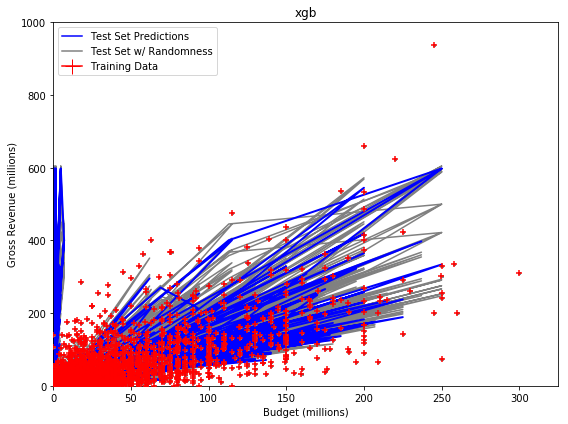

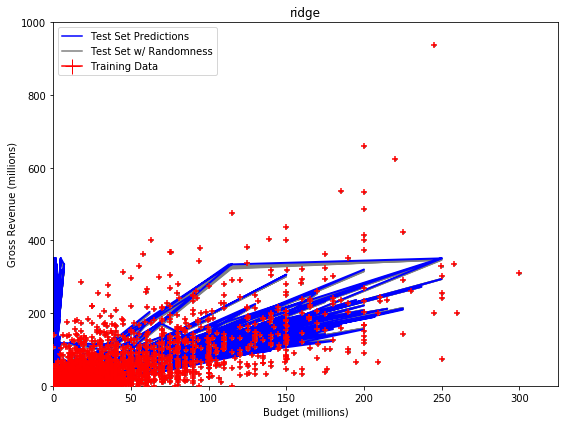

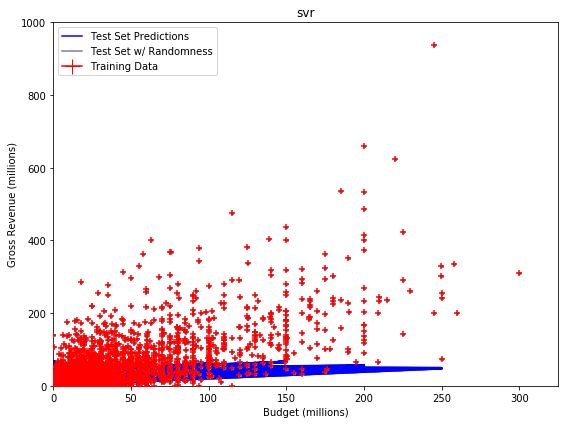

In [631]:
import matplotlib.lines as mlines

classifiers = dict(xgb=xgb.XGBRegressor(), ridge=linear_model.RidgeCV(alphas=np.logspace(-10, 11, 200)), svr=SVR())

for name, clf in classifiers.items():
    
    fig, ax = plt.subplots(figsize=(8, 6))

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(3478, 6)) + xtrain1
        clf.fit(this_X, ytrain1)
        
        ax.plot(xtest1, clf.predict(xtest1), color='gray')
        gray = ax.scatter(np.c_[this_X[:,0]], ytrain1, s=3, c='gray', marker='o', zorder=10)

    clf.fit(xtrain1, ytrain1)
    blue = ax.plot(xtest1, clf.predict(xtest1), linewidth=2, color='blue', label="Test Set Predictions")

    red = ax.scatter(np.c_[this_X[:,0]], ytrain1, s=30, c='red', marker='+', zorder=10, label="Training Data")

    ax.set_title(name)
    ax.set_xlim(0, 325)
    ax.set_ylim((0, 1000))
    ax.set_xlabel('Budget (millions)')
    ax.set_ylabel('Gross Revenue (millions)')
    
    blue_line = mlines.Line2D([], [], color='blue',
                          markersize=15, label='Test Set Predictions')
    gray_line = mlines.Line2D([], [], color='gray',
                          markersize=15, label='Test Set w/ Randomness')
    red_star = mlines.Line2D([], [], color='red', marker='+',
                          markersize=15, label='Training Data')
    
    ax.legend(handles=[blue_line, gray_line, red_star])
    fig.tight_layout()

plt.show()



In [572]:
###Ideas
#doing gross instead of profit changes this from .11 to .51 immediately


#play around with the weightings of different things
#Change from zscores to something else
#do a logisitc regression instead

In [573]:
cv_model = linear_model.ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=6, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=0)
               
cv_model.fit(xtrain1, ytrain1)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00092823
Optimal l1_ratio: 0.990
Number of iterations 10


In [574]:
y_train_pred = cv_model.predict(xtrain1)
y_pred = cv_model.predict(xtest1)
print(y_pred)
print('Train r2 score: ', r2_score(y_train_pred, ytrain1))
print('Test r2 score: ', r2_score(ytest1, y_pred))
train_mse = mean_squared_error(y_train_pred, ytrain1)
test_mse = mean_squared_error(y_pred, ytest1)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)

[24.46999259 26.47351735 33.92984247 ... 29.46631061 69.30861156
 37.27843783]
Train r2 score:  0.35566765141666046
Test r2 score:  0.5234025347327644
Train RMSE: 39.8546
Test RMSE: 49.6137


In [575]:
xgb_model1 = xgb.XGBRegressor()
xgb_model1.fit(xtrain1, ytrain1, verbose=False)
y_train_pred1 = xgb_model1.predict(xtrain1)
y_pred1 = xgb_model1.predict(xtest1)

print('Train r2 score: ', r2_score(y_train_pred1, ytrain1))
print('Test r2 score: ', r2_score(ytest1, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, ytrain1)
test_mse1 = mean_squared_error(y_pred1, ytest1)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

Train r2 score:  0.6290467824139124
Test r2 score:  0.5301285525376003
Train RMSE: 32.3253
Test RMSE: 49.2624


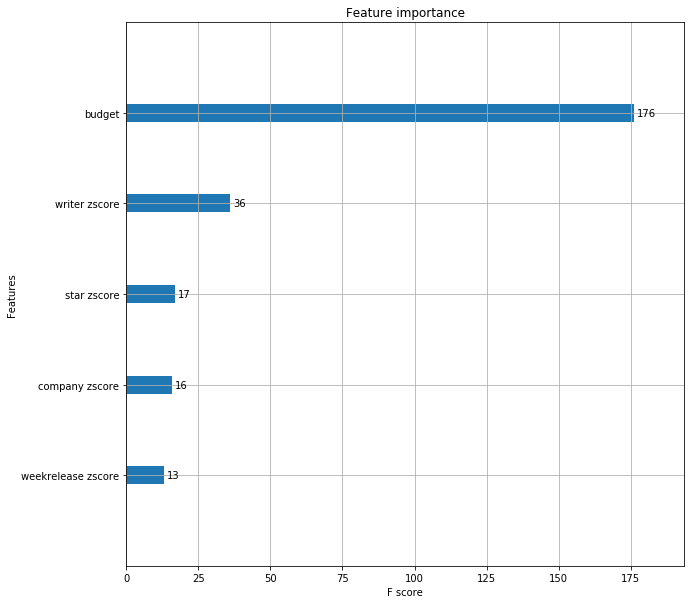

In [582]:
data_dmatrix = xgb.DMatrix(data=X_train1,label=ytrain1)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 6, 'alpha': 10}

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


In [617]:
series0 = xgb_model1.get_booster().get_score(importance_type= 'weight')
series1 = xgb_model1.get_booster().get_score(importance_type= 'gain')
series2 = xgb_model1.get_booster().get_score(importance_type= 'cover')



series0 = pd.DataFrame.from_dict(series0, orient='index',
                       columns=['Weight'])
series1 = pd.DataFrame.from_dict(series1, orient='index',
                       columns=['Gain'])
series2 = pd.DataFrame.from_dict(series2, orient='index',
                       columns=['Cover'])

weight = pd.concat([series0], axis = 1)

weight.index = ['Budget', 'Star', 'Writer', 'Week of Release', 'Company', 'Rating']
weight

,Weight
budget,179
star zscore,136
writer zscore,83
weekrelease zscore,112
company zscore,133
rating zscore,35


Text(0.5,1,'XGBoost Weights of Movie Features')

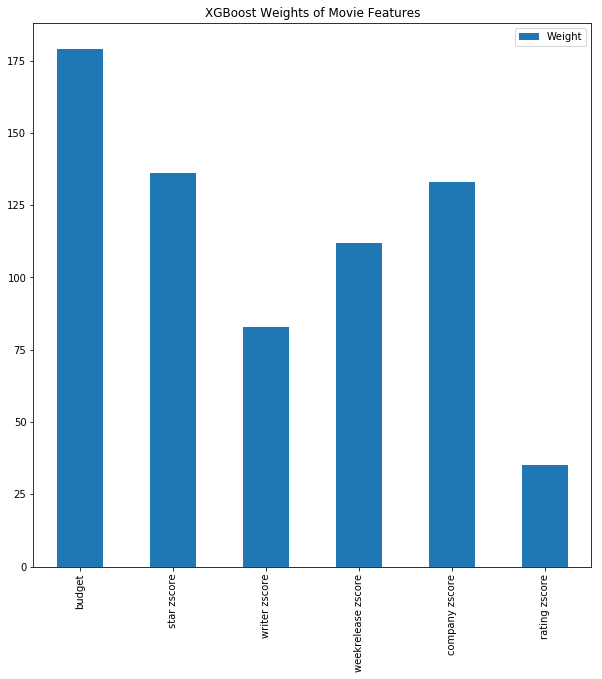

In [629]:
weight.plot.bar().set_title('XGBoost Weights of Movie Features')

Text(0.5,1,'Gains of Different Movie Features')

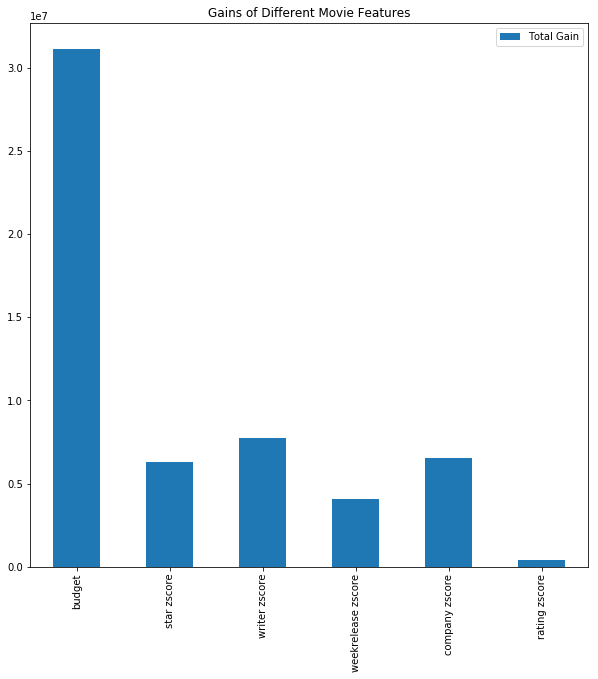

In [630]:
series3 = xgb_model1.get_booster().get_score(importance_type= 'total_gain')
series3 = pd.DataFrame.from_dict(series3, orient='index',
                       columns=['Total Gain'])
series3.index = ['budget', 'star zscore', 'writer zscore', 'weekrelease zscore', 'company zscore', 'rating zscore']

series3.plot.bar().set_title('Gains of Different Movie Features')

In [578]:
SupportVectorRegModel = SVR()
SupportVectorRegModel.fit(xtrain1, ytrain1)
y_train_pred1 = SupportVectorRegModel.predict(xtrain1)
y_pred1 = SupportVectorRegModel.predict(xtest1)

print('Train r2 score: ', r2_score(y_train_pred1, ytrain1))
print('Test r2 score: ', r2_score(ytest1, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, ytrain1)
test_mse1 = mean_squared_error(y_pred1, ytest1)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

/Users/brandonzhu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train r2 score:  -10.125773413635804
Test r2 score:  0.1084094738258281
Train RMSE: 59.1641
Test RMSE: 67.8592


In [649]:
d = {'Training R2': [0.629, 0.3697, 0.356, -10.126], 'Test R2': [0.5301, 0.526, 0.523, 0.108],'Train RMS Error (mil)': [32.325,39.848, 39.855, 59.164], 'Test RMS Error (mil)': [49.262,49.470, 49.614, 67.859]}
df = pd.DataFrame(data=d)
df.index = ['XGBoost', 'Lin Reg with RidgeCV', 'ElasticNetCV', 'Support Vector Regression']
df


,Training R2,Test R2,Train RMS Error (mil),Test RMS Error (mil)
XGBoost,0.6290,0.5301,32.325,49.262
Lin Reg with RidgeCV,0.3697,0.5260,39.848,49.470
ElasticNetCV,0.3560,0.5230,39.855,49.614
Support Vector Regression,-10.1260,0.1080,59.164,67.859
